 # Hakim, Arnold, coundé performance analysis 2024-2025 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [40]:
# اقاف التحدير
import warnings
warnings.filterwarnings("ignore")


# import or create data

In [2]:

# إنشاء قائمة بالقيم لكل لاعب
data = {
    'Stat': [
        'Matches Played', 'Started', 'Minutes/Game', 'Total Minutes', 'Team of the Week',
        'Goals', 'xG', 'Goals/Game', 'Scoring Frequency', 'Shots/Game', 'Shots on Target/Game',
        'Big Chances Missed', 'Goal Conversion', 'Inside Box Goals', 'Outside Box Goals',
        'Right-footed Goals', 'Left-footed Goals',
        'Assists', 'xA', 'Touches', 'Big Chances Created', 'Key Passes/Game',
        'Accurate Passes', 'Acc. Own Half', 'Acc. Opp. Half', 'Acc. Long Balls',
        'Acc. Chip Passes', 'Acc. Crosses',
        'Clean Sheets', 'Interceptions', 'Tackles/Game', 'Final 3rd Possession Won',
        'Balls Recovered/Game', 'Dribbled Past/Game', 'Clearances',
        'Errors to Shot', 'Errors to Goal'
    ],
    'Hakimi': [
        24, 23, 82, 1977, 7,
        4, 2.98, 0.2, 494, 1.3, 0.5,
        4, 13, 4, 0,
        4, 0,
        6, 5.26, 99.4, 12, 2.1,
        70.0, 22.3, 48.3, 1.5,
        1.5, 0.7,
        7, 1.2, 2.0, 0.8,
        5.5, 1.2, 0.6,
        3, 0
    ],
    'Arnold': [
        29, 26, 75, 2176, 5,
        3, 1.61, 0.1, 725, 1.3, 0.3,
        2, 8, 2, 1,
        2, 1,
        6, 6.72, 73.2, 14, 1.9,
        39.7, 15.7, 25.3, 4.1,
        3.0, 1.3,
        4, 1.0, 2.3, 0.3,
        4.2, 1.8, 1.6,
        4, 0
    ],
    'Kounde': [
        32, 29, 81, 2606, 3,
        2, 1.81, 0.1, 1303, 0.6, 0.2,
        3, 11, 2, 0,
        1, 1,
        3, 3.79, 79.0, 6, 1.0,
        50.0, 21.0, 29.3, 1.7,
        1.1, 0.3,
        8, 0.6, 2.0, 0.4,
        3.3, 0.7, 1.8,
        1, 1
    ]
}

# إنشاء DataFrame
df = pd.DataFrame(data)

# عرض أول 10 صفوف
df.head(10)


,Stat,Hakimi,Arnold,Kounde
0,Matches Played,24.00,29.00,32.00
1,Started,23.00,26.00,29.00
2,Minutes/Game,82.00,75.00,81.00
3,Total Minutes,1977.00,2176.00,2606.00
4,Team of the Week,7.00,5.00,3.00
5,Goals,4.00,3.00,2.00
6,xG,2.98,1.61,1.81
7,Goals/Game,0.20,0.10,0.10
8,Scoring Frequency,494.00,725.00,1303.00
9,Shots/Game,1.30,1.30,0.60


In [3]:
df

,Stat,Hakimi,Arnold,Kounde
0,Matches Played,24.00,29.00,32.00
1,Started,23.00,26.00,29.00
2,Minutes/Game,82.00,75.00,81.00
3,Total Minutes,1977.00,2176.00,2606.00
4,Team of the Week,7.00,5.00,3.00
5,Goals,4.00,3.00,2.00
6,xG,2.98,1.61,1.81
7,Goals/Game,0.20,0.10,0.10
8,Scoring Frequency,494.00,725.00,1303.00
9,Shots/Game,1.30,1.30,0.60


In [4]:
# بيانات اللاعبين في شكل قواميس
hakimi = {
    "name": "Achraf Hakimi",
    "matches": 24,
    "goals": 4,
    "assists": 6,
    "xG": 2.98,
    "xA": 5.26,
    "key_passes": 2.1,
    "big_chances_created": 12,
    "shots_per_game": 1.3,
    "tackles_per_game": 2.0,
    "interceptions": 1.2,
    "recoveries": 5.5,
    "dribbled_past": 1.2,
    "errors_to_goal": 0
}

arnold = {
    "name": "Trent Alexander-Arnold",
    "matches": 29,
    "goals": 3,
    "assists": 6,
    "xG": 1.61,
    "xA": 6.72,
    "key_passes": 1.9,
    "big_chances_created": 14,
    "shots_per_game": 1.3,
    "tackles_per_game": 2.3,
    "interceptions": 1.0,
    "recoveries": 4.2,
    "dribbled_past": 1.8,
    "errors_to_goal": 0
}

kounde = {
    "name": "Jules Koundé",
    "matches": 32,
    "goals": 2,
    "assists": 3,
    "xG": 1.81,
    "xA": 3.79,
    "key_passes": 1.0,
    "big_chances_created": 6,
    "shots_per_game": 0.6,
    "tackles_per_game": 2.0,
    "interceptions": 0.6,
    "recoveries": 3.3,
    "dribbled_past": 0.7,
    "errors_to_goal": 1
}

# جمع اللاعبين في قائمة
players = [hakimi, arnold, kounde]


# Data visualization 

In [28]:

# إنشاء DataFrame من قائمة القواميس
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(players)

# عرض أول صفوف الجدول
# Display the first few rows of the table
df


,name,matches,goals,assists,xG,xA,key_passes,big_chances_created,shots_per_game,tackles_per_game,interceptions,recoveries,dribbled_past,errors_to_goal
0,Achraf Hakimi,24,4,6,2.98,5.26,2.1,12,1.3,2.0,1.2,5.5,1.2,0
1,Trent Alexander-Arnold,29,3,6,1.61,6.72,1.9,14,1.3,2.3,1.0,4.2,1.8,0
2,Jules Koundé,32,2,3,1.81,3.79,1.0,6,0.6,2.0,0.6,3.3,0.7,1


In [11]:
# Bar Chart Visualization - Comparing Goals and Assists

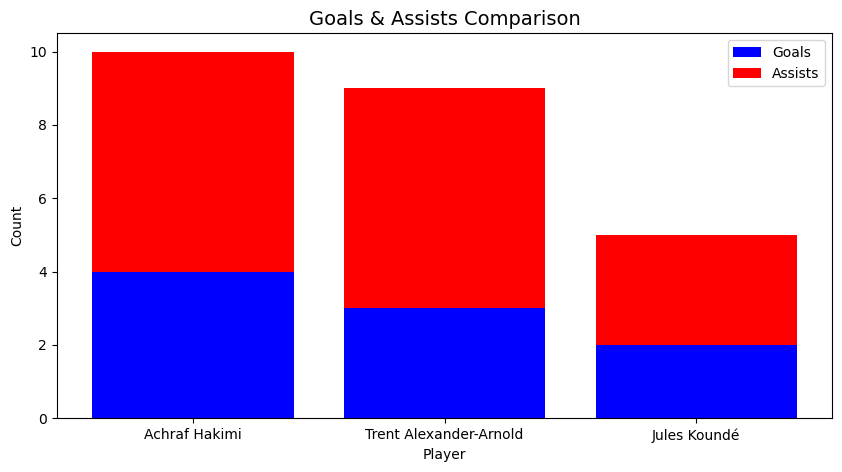

In [15]:

# إعداد حجم الرسم
# Set figure size
plt.figure(figsize=(10, 5))

# رسم الأعمدة للأهداف
# Plot bars for goals
plt.bar(df["name"], df["goals"], color='blue', label='Goals')

# رسم الأعمدة للتمريرات الحاسمة
# Plot bars for assists
plt.bar(df["name"], df["assists"], bottom=df["goals"], color='red', label='Assists')

# عنوان الرسم
# Chart title
plt.title("Goals & Assists Comparison", fontsize=14)

# تسمية المحاور
# Axis labels
plt.xlabel("Player")
plt.ylabel("Count")

# عرض وسيلة الإيضاح
# Show legend
plt.legend()

# عرض الرسم
# Show plot
plt.show()


In [10]:
# Defensive Statistics Comparison)

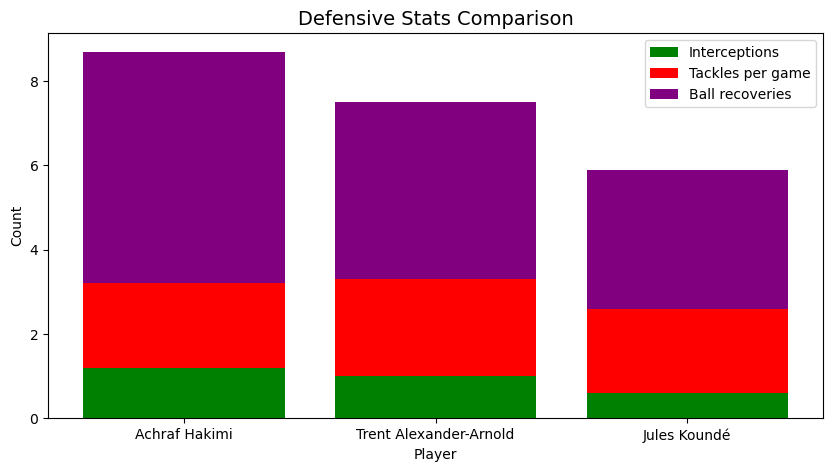

In [18]:
# إعداد حجم الرسم
# Set figure size
plt.figure(figsize=(10, 5))

# رسم الأعمدة للتدخلات (Interceptions)
# Plot bars for Interceptions
plt.bar(df["name"], df["interceptions"], color='green', label='Interceptions')

# رسم الأعمدة للتسديدات المقطوعة (Tackles per game)
# Plot bars for Tackles
plt.bar(df["name"], df["tackles_per_game"], bottom=df["interceptions"], color='red', label='Tackles per game')

# رسم الأعمدة للكرات المستعادة (Ball recoveries)
# Plot bars for Ball recoveries
plt.bar(df["name"], df["recoveries"], bottom=df["interceptions"]+df["tackles_per_game"], color='purple', label='Ball recoveries')

# عنوان الرسم
# Chart title
plt.title("Defensive Stats Comparison", fontsize=14)

# تسمية المحاور
# Axis labels
plt.xlabel("Player")
plt.ylabel("Count")

# عرض وسيلة الإيضاح
# Show legend
plt.legend()

# عرض الرسم
# Show plot
plt.show()


In [19]:
# minutes played 

In [22]:
# عرض أسماء الأعمدة في DataFrame
# Display column names in the DataFrame
print(df.columns)


Index(['name', 'matches', 'goals', 'assists', 'xG', 'xA', 'key_passes',
       'big_chances_created', 'shots_per_game', 'tackles_per_game',
       'interceptions', 'recoveries', 'dribbled_past', 'errors_to_goal'],
      dtype='object')


In [29]:
# إذا كانت لديك معلومات حول الدقائق لكل مباراة، مثل 82 دقيقة لكل مباراة
df['minutes_per_game'] = 82  # مثال فقط، يمكن تعديلها بحسب البيانات المتوفرة

# الآن، حساب إجمالي الدقائق
df['total_minutes_played'] = df['matches'] * df['minutes_per_game']

# تحقق من النتائج
print(df[['name', 'matches', 'minutes_per_game', 'total_minutes_played']])


                     name  matches  minutes_per_game  total_minutes_played
0           Achraf Hakimi       24                82                  1968
1  Trent Alexander-Arnold       29                82                  2378
2            Jules Koundé       32                82                  2624


In [30]:
# حساب الدقائق لكل مباراة
df['minutes_per_game'] = df['total_minutes_played'] / df['matches']


In [31]:
# عرض الأعمدة الجديدة
print(df[['name', 'matches', 'total_minutes_played', 'minutes_per_game']])


                     name  matches  total_minutes_played  minutes_per_game
0           Achraf Hakimi       24                  1968              82.0
1  Trent Alexander-Arnold       29                  2378              82.0
2            Jules Koundé       32                  2624              82.0


In [32]:
# حساب الدقائق لكل مباراة (Minutes per Game)
# Calculate minutes per game
df['minutes_per_game'] = df['total_minutes_played'] / df['matches']

# عرض الأعمدة الجديدة
# Display the new columns
print(df[['name', 'matches', 'total_minutes_played', 'minutes_per_game']])


                     name  matches  total_minutes_played  minutes_per_game
0           Achraf Hakimi       24                  1968              82.0
1  Trent Alexander-Arnold       29                  2378              82.0
2            Jules Koundé       32                  2624              82.0


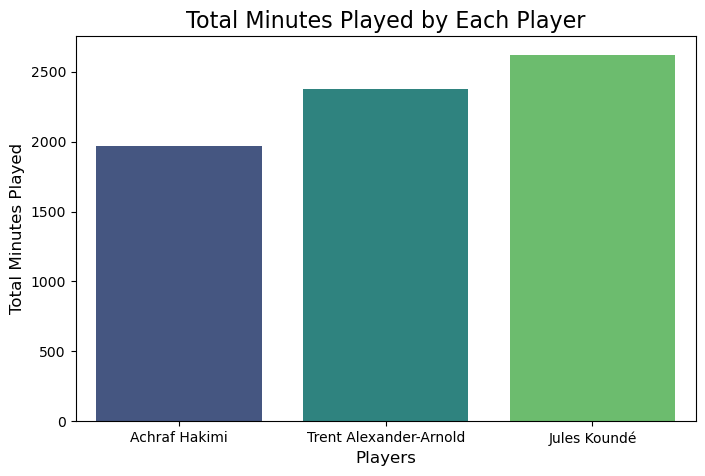

In [35]:
# Bar plot to compare total minutes played by each player
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x='name', y='total_minutes_played', data=df, palette='viridis')

# Add title and labels
plt.title('Total Minutes Played by Each Player', fontsize=16)
plt.xlabel('Players', fontsize=12)
plt.ylabel('Total Minutes Played', fontsize=12)

# Show the plot
plt.show()


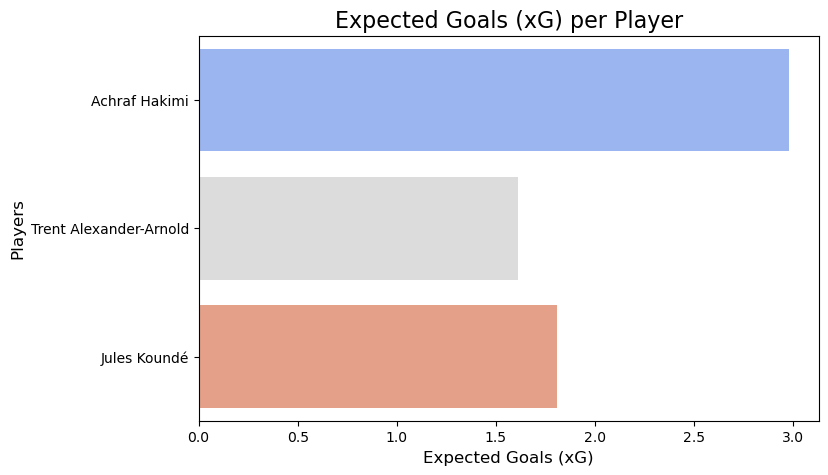

In [37]:
# Horizontal bar plot to compare expected goals (xG) per player
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(8, 5))

# Create the horizontal bar plot
sns.barplot(y='name', x='xG', data=df, palette='coolwarm')

# Add title and labels
plt.title('Expected Goals (xG) per Player', fontsize=16)
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Players', fontsize=12)

# Show the plot
plt.show()


In [38]:
# Assists made

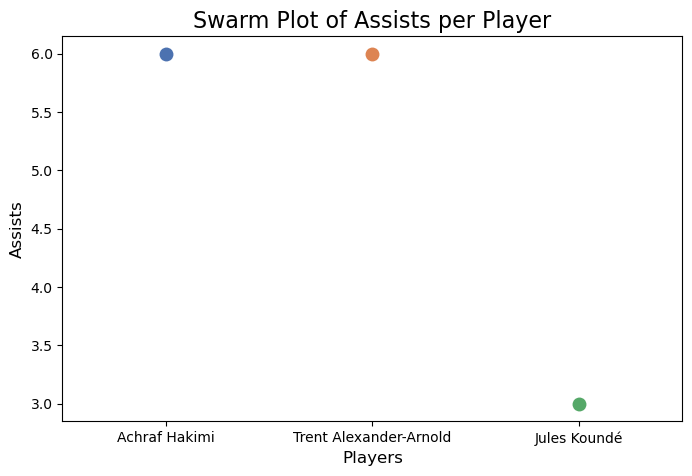

In [43]:
# Swarm plot to compare assists made by each player
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(8, 5))

# Create the swarm plot
sns.swarmplot(x='name', y='assists', data=df, size=10, palette='deep')

# Add title and labels
plt.title('Swarm Plot of Assists per Player', fontsize=16)
plt.xlabel('Players', fontsize=12)
plt.ylabel('Assists', fontsize=12)

# Show the plot
plt.show()


In [47]:
# Create a radar chart to compare all players across different statistics

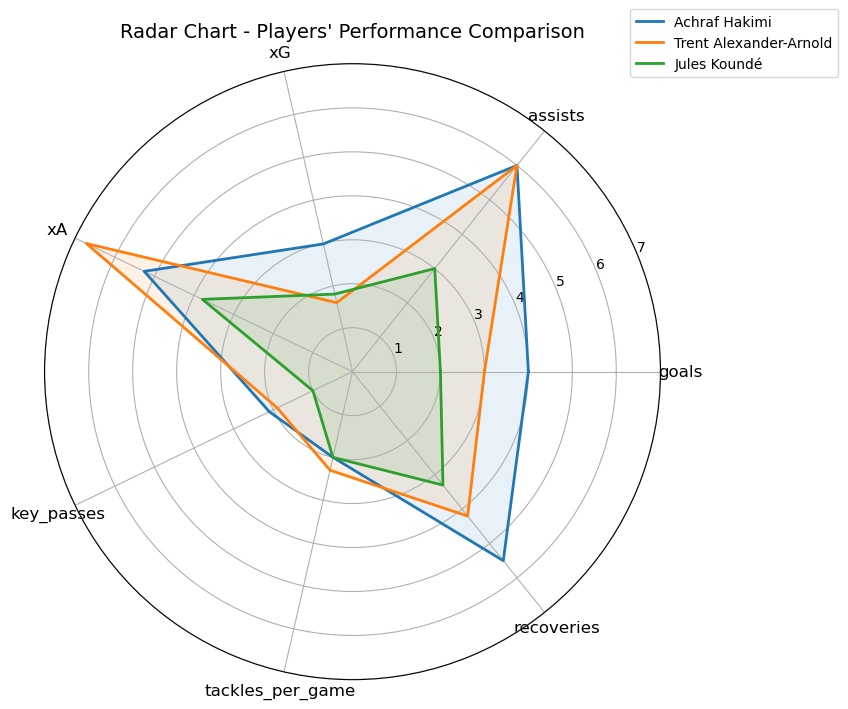

In [46]:
# مكتبات للرسم
import matplotlib.pyplot as plt
import numpy as np

# نحدد المؤشرات التي نريد عرضها (اخترنا بعض الإحصائيات فقط لتبسيط الشكل)
categories = ['goals', 'assists', 'xG', 'xA', 'key_passes', 'tackles_per_game', 'recoveries']

# عدد المحاور
N = len(categories)

# تحويل الزاوية إلى راديان لكل محور
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # لإغلاق الدائرة

# بدء الرسم
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# رسم كل لاعب
for i in range(len(df)):
    values = df.loc[i, categories].tolist()
    values += values[:1]  # لإغلاق الدائرة
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.loc[i, 'name'])
    ax.fill(angles, values, alpha=0.1)

# إضافة أسماء المحاور
plt.xticks(angles[:-1], categories, fontsize=12)

# إضافة العنوان
plt.title('Radar Chart - Players\' Performance Comparison', fontsize=14)

# إظهار وسيلة الإيضاح
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# عرض المبيان
plt.show()


In [48]:
# calculate the average of key stats for each player and d

In [49]:
# حساب المتوسط لبعض الإحصائيات المهمة
# Calculate the mean of important stats

# تحديد الأعمدة التي سنحسب عليها المتوسط
stats_to_average = ['goals', 'assists', 'xG', 'xA', 'key_passes', 'tackles_per_game', 'recoveries']

# إنشاء DataFrame جديد يحوي اسم اللاعب والمتوسطات
averages_df = df[['name'] + stats_to_average].copy()

# عرض النتائج
print(averages_df)


                     name  goals  assists    xG    xA  key_passes  \
0           Achraf Hakimi      4        6  2.98  5.26         2.1   
1  Trent Alexander-Arnold      3        6  1.61  6.72         1.9   
2            Jules Koundé      2        3  1.81  3.79         1.0   

   tackles_per_game  recoveries  
0               2.0         5.5  
1               2.3         4.2  
2               2.0         3.3  


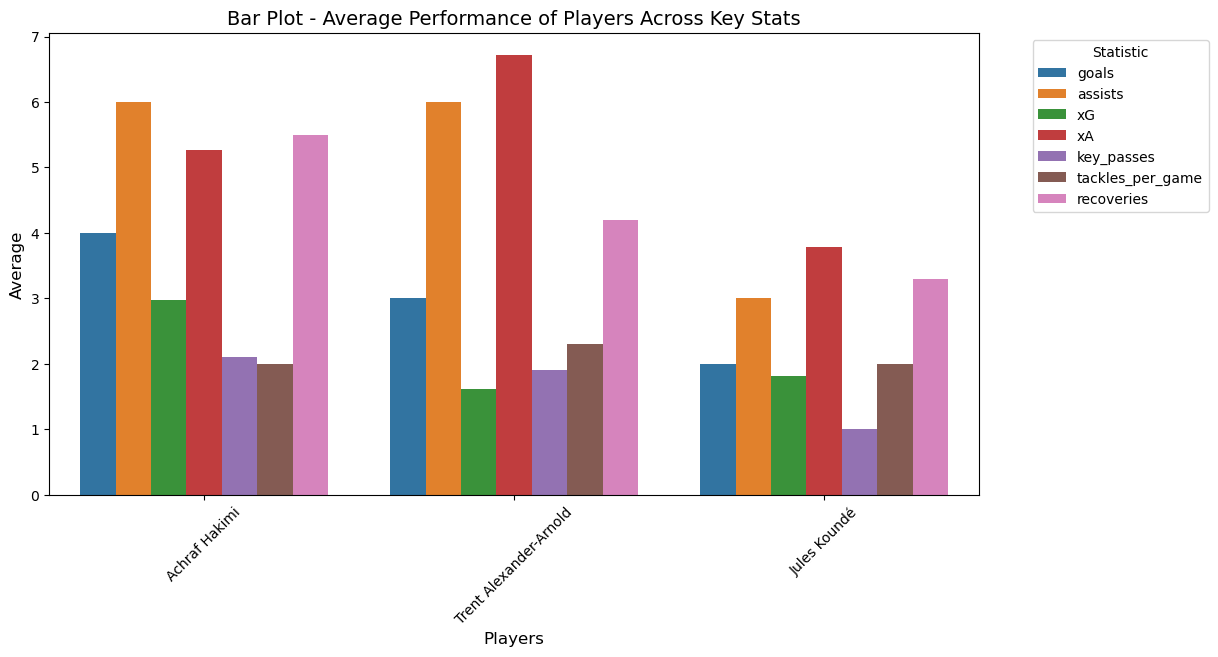

In [50]:

# حساب المتوسطات للأعمدة المهمة
averages_df = df[['name'] + stats_to_average].copy()

# تحويل البيانات من شكل wide إلى long لتسهيل الرسم
averages_long_df = averages_df.melt(id_vars=['name'], value_vars=stats_to_average, 
                                    var_name='Statistic', value_name='Average')

# رسم المبيان
plt.figure(figsize=(12, 6))
sns.barplot(data=averages_long_df, x='name', y='Average', hue='Statistic')

# إضافة العنوان
plt.title('Bar Plot - Average Performance of Players Across Key Stats', fontsize=14)

# إضافة تسميات المحاور
plt.xlabel('Players', fontsize=12)
plt.ylabel('Average', fontsize=12)

# عرض المبيان
plt.xticks(rotation=45)
plt.legend(title='Statistic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


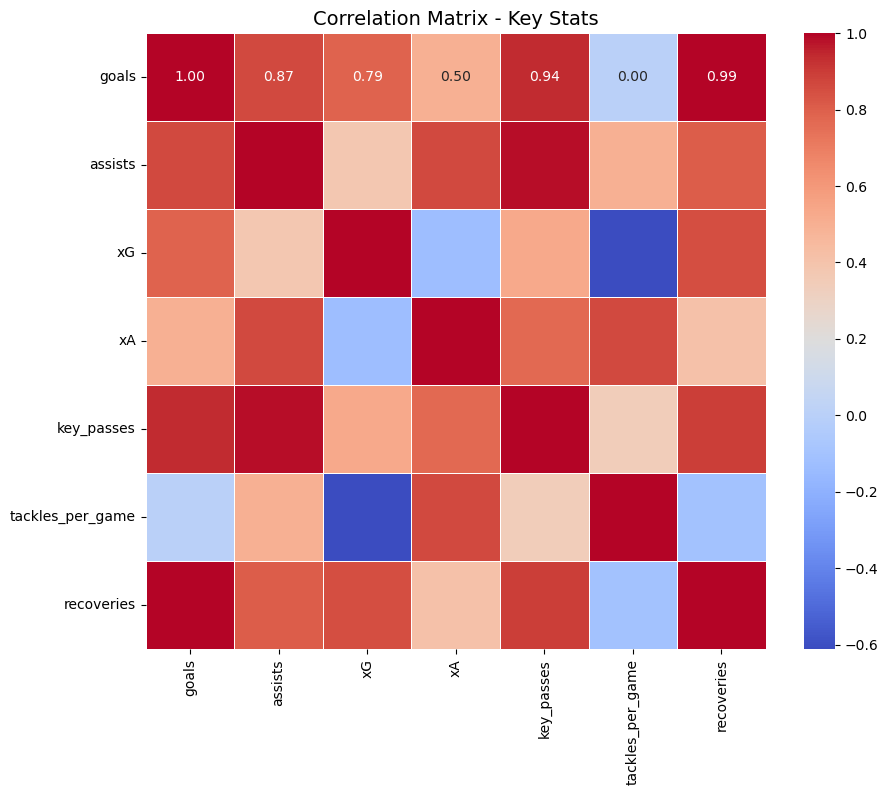

In [51]:
# حساب مصفوفة الارتباط بين الإحصائيات المهمة
# Calculate the correlation matrix for the key stats
correlation_matrix = df[stats_to_average].corr()

# رسم مصفوفة الارتباط باستخدام Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# إضافة العنوان
plt.title('Correlation Matrix - Key Stats', fontsize=14)

# عرض المبيان
plt.show()
